In [7]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL

In [3]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
IMAGE_SIZE = [176, 208]
EPOCHS = 100
BATCH_SIZE= 100

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=IMAGE_SIZE,
    batch_size= BATCH_SIZE,
)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/train",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

Found 5121 files belonging to 4 classes.
Using 1024 files for validation.


In [10]:
class_names = ['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']
train_ds.class_names = class_names
val_ds.class_names = class_names

NUM_CLASSES = len(class_names)

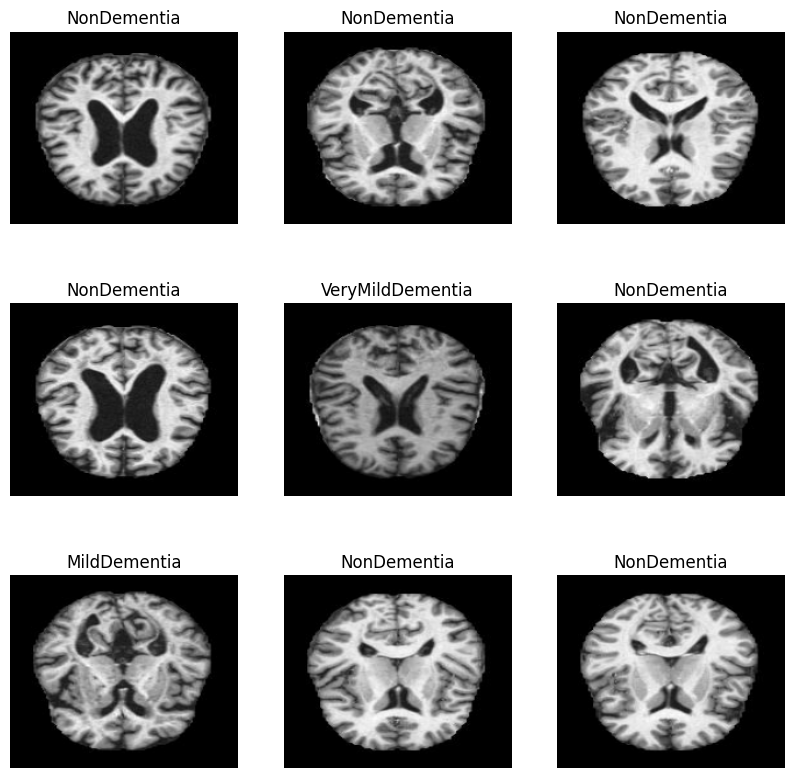

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [12]:
def one_hot_label(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

train_ds = train_ds.map(one_hot_label, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(one_hot_label, num_parallel_calls=AUTOTUNE)

In [13]:
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
NUM_IMAGES = []

for label in class_names:
    dir_name = "dataset/train" + label[:-2] + 'ed'
    NUM_IMAGES.append(len([name for name in os.listdir(dir_name)]))

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/MildDemented'